In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

## Generate Mock Data

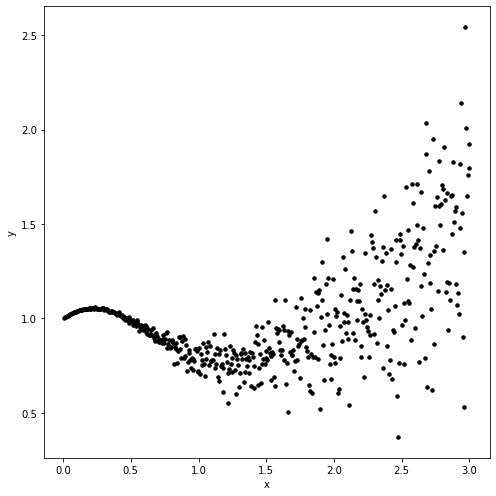

In [2]:
seed = 1994351
x = np.linspace(.01, 3, 500)
y = .5*x + .3**(x**2) + np.random.normal(loc=0, scale=(.05*(x**2)))

plt.figure(figsize=(7, 7))
plt.scatter(x, y, c='k', s=12)
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()

## Kernel Density Estimation

https://jduncstats.com/posts/2019-03-16-kde-scratch/

In [3]:
import arviz as az

If you have not installed the module, run this code

Read the documentation here https://arviz-devs.github.io/arviz/api/generated/arviz.plot_kde.html

Visualize 1D Kernel Density Estimation (KDE) using arviz

<AxesSubplot:>

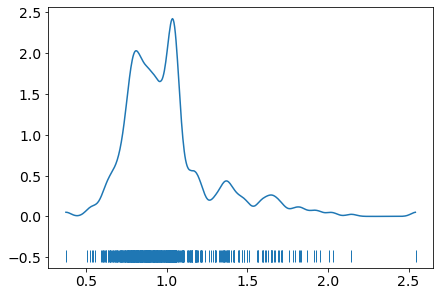

In [4]:
az.plot_kde(y, rug=True)

/home/vysakh/.local/lib/python3.8/site-packages/arviz/stats/density_utils.py:252: RuntimeWarning: divide by zero encountered in double_scalars
  out = t - (2 * N * np.pi ** 0.5 * f) ** (-0.4)


<AxesSubplot:>

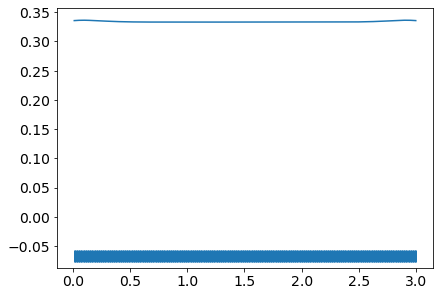

In [5]:
az.plot_kde(x, rug=True)

Visualize 2D KDE using arviz

/home/vysakh/.local/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/kdeplot.py:173: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x_x, y_y, density, **pcolormesh_kwargs)


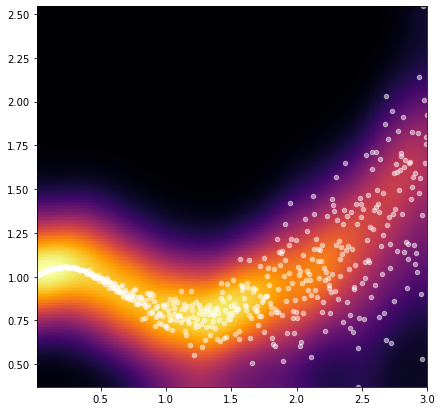

In [6]:
plt.figure(figsize=(7, 7))

az.plot_kde(x, values2=y, contour=False, pcolormesh_kwargs={'cmap': 'inferno'})
plt.scatter(x, y, facecolor='None', c='w', alpha=0.5, s = 20)

## Spline Regression

In [7]:
data_x = x
data_y = y

# Dividing data into train and validation datasets
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=0.25, random_state = 1)

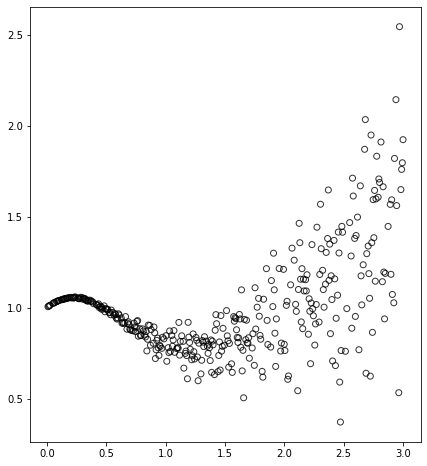

In [8]:
# Visualize the relationship
import matplotlib.pyplot as plt

plt.figure(figsize=(7,8))
plt.scatter(train_x, train_y, facecolor='None', edgecolor='k', alpha=0.8)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(data_x, data_y, test_size=0.3, random_state = 11343)

In [10]:
y_train

array([1.51177681, 1.01808138, 1.86998504, 1.79607393, 1.78359179,
       1.40701294, 0.83083871, 0.90391156, 1.17453914, 0.86442125,
       1.0541179 , 1.01040058, 0.90087255, 0.84708552, 1.14978533,
       1.49739584, 1.46729447, 0.89181785, 1.71391934, 1.92291873,
       0.83414194, 0.87898532, 0.8830223 , 1.09762784, 0.99159272,
       1.03087687, 0.78650886, 0.78612431, 0.98833709, 0.93910502,
       0.81593424, 0.85532054, 0.73515372, 1.20490024, 1.12887059,
       0.77780281, 2.14288359, 1.35418351, 0.89005671, 0.96602901,
       1.03023046, 2.00724424, 0.59791835, 1.04284664, 0.84664169,
       0.99224436, 0.76115102, 0.73690296, 0.81987367, 0.72000261,
       0.83353895, 0.79260368, 1.23536234, 1.09800249, 1.75959659,
       1.01592792, 0.92114174, 0.86727233, 0.99311569, 0.76822031,
       0.809969  , 0.82351782, 0.97368909, 1.34880347, 1.01078301,
       1.05254703, 1.02690098, 0.97123442, 1.048157  , 1.13595001,
       0.71315739, 1.002252  , 1.03689762, 0.54314413, 1.59749

In [48]:
from patsy import dmatrix
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score

Here are the documentations for patsy and stasmodels

https://patsy.readthedocs.io/en/latest/API-reference.html <br>
https://www.statsmodels.org/stable/index.html

In [49]:
knots = 5
degree = 3 # try different knots and degree values

X_spline = dmatrix('bs(x,df = '+str(knots)+', degree = '+str(degree)+', include_intercept = False)', {'x': X_train},return_type = 'dataframe')
spline_fit = sm.GLM(y_train,X_spline).fit()

y_pred_train = spline_fit.predict(dmatrix('bs(test, df = '+str(knots)+', degree = '+str(degree)+', include_intercept = False)', {'test': X_train},return_type = 'dataframe'))
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
print(rmse_train)   
print(r2_score(y_train,y_pred_train))

0.21487888762476667
0.5298705207173253


In [50]:
y_pred = spline_fit.predict(dmatrix('bs(test, df = '+str(knots)+', degree = '+str(degree)+', include_intercept = False)', {'test': X_test},return_type = 'dataframe'))
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))
print(rmse_test)
print(r2_score(y_test,y_pred))

0.19622084221634137
0.5363487514437895


In [51]:
range_pred = np.linspace(np.min(X_train),np.max(X_train),50)
prediction = spline_fit.predict(dmatrix('bs(xp, df = '+str(knots)+', degree = '+str(degree)+',include_intercept = False)', {'xp': range_pred},return_type = 'dataframe'))

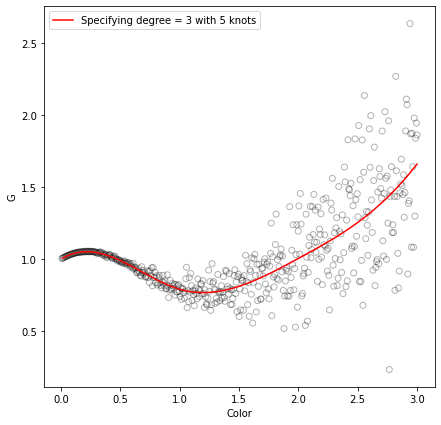

In [52]:
plt.figure(figsize=(7,7))
plt.plot(range_pred, prediction, color='r', label='Specifying degree = '+str(degree)+' with '+str(knots)+' knots')
plt.scatter(data_x, data_y, facecolor='None', edgecolor='k', alpha=0.3)
plt.xlabel('Color')
plt.ylabel("G")
plt.legend()

/home/vysakh/.local/lib/python3.8/site-packages/arviz/plots/backends/matplotlib/kdeplot.py:173: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(x_x, y_y, density, **pcolormesh_kwargs)


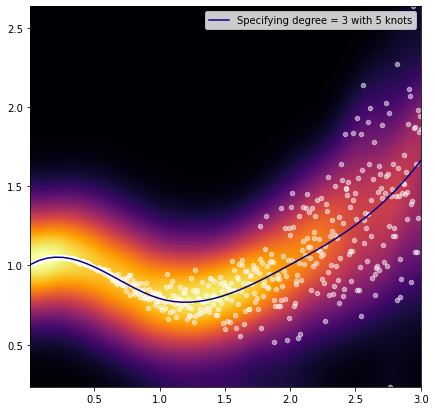

In [53]:
plt.figure(figsize=(7, 7))

az.plot_kde(x, values2=y, contour=False, pcolormesh_kwargs={'cmap': 'inferno'})
plt.scatter(x, y, facecolor='None', c='w', alpha=0.5, s = 20)
plt.plot(range_pred, prediction, color='darkblue', label='Specifying degree = '+str(degree)+' with '+str(knots)+' knots')
plt.legend()

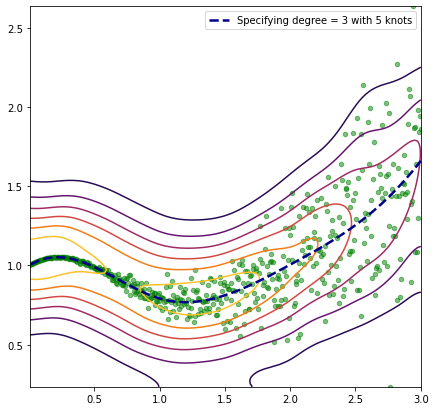

In [54]:
plt.figure(figsize=(7, 7))

az.plot_kde(x, values2=y, contour_kwargs={"colors":None, "cmap":plt.cm.inferno}, contourf_kwargs={"alpha":0})
plt.scatter(x, y, facecolor='None', c='g', alpha=0.5, s = 20)
plt.plot(range_pred, prediction, color='darkblue', label='Specifying degree = '+str(degree)+' with '+str(knots)+' knots', linestyle='--', linewidth=2.5)
plt.legend()

## Assignments

1. Get the members of three clusters in HDBSCAN Hands-on session
2. Make 2D kernel for each cluster
3. Get the Main-sequence diagonal line in CMD using spline regression

Here is the example

<img src='kde2d_ngc752.png' width='500'>